# ECE 285 – Project B Total Variation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectB as im
starfish = plt.imread('assets/starfish.png')
flowers = plt.imread('assets/flowers.png')
ball = plt.imread('assets/ball.png')
%matplotlib notebook

## 1 Operators

### 1

#### 2

### 3

### 4

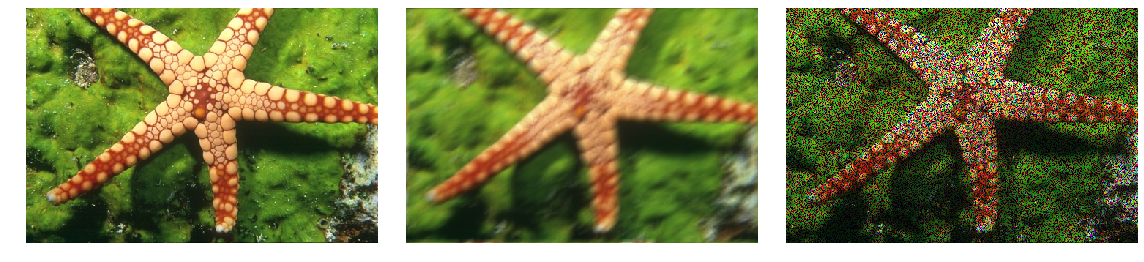

In [3]:
x0 = starfish
I = im.Identity(x0.shape)
nu = im.kernel('motion')
C = im.Convolution(x0.shape, nu)
R = im.RandomMasking(x0.shape, 0.4)
x1 = I(x0)
x2 = C(x0)
x3 = R(x0)
fig, axes = plt.subplots(ncols=3, figsize=(16,4)) 
im.show(x1, ax=axes[0])
im.show(x2, ax=axes[1])
im.show(x3, ax=axes[2])
fig.show()

### 5

In [4]:
x = starfish
y = flowers

x_ic = im.Identity(x.shape)(x)
y_ia = im.Identity(y.shape).adjoint(y)
print("The statement for Identity operator:",np.isclose(np.sum(x_ic*y),np.sum(x*y_ia)))

nu = im.kernel('motion')
x_cc = im.Convolution(x.shape, nu)(x)
y_ca = im.Convolution(y.shape, nu).adjoint(y)
print("The statement for Convolution operator:",np.isclose(np.sum(x_cc*y),np.sum(x*y_ca)))

x_rc = im.RandomMasking(x.shape, 1)(x)
y_ra = im.RandomMasking(y.shape, 1)(y)
print("The statement for RandomMasking operator:",np.isclose(np.sum(x_rc*y),np.sum(x*y_ra)))

The statement for Identity operator: True
The statement for Convolution operator: True
The statement for RandomMasking operator: True


### 6

In [5]:
t = 0.1
xi = im.Identity(x.shape)
x_il = xi.gram_resolvent(x+t*xi.gram(x), t)
print("The statement for Identity operator:",np.allclose(x_il, x))

nu = im.kernel('motion')
xc = im.Convolution(x.shape, nu)
x_cl = xc.gram_resolvent(x+t*xc.gram(x), t)
print("The statement for Convolution operator:",np.allclose(x_cl, x))

xr = im.Identity(x.shape, 0.4)
x_rl = xr.gram_resolvent(x+t*xr.gram(x), t)
print("The statement for RandomMasking operator:",np.allclose(x_rl, x))

The statement for Identity operator: True
The statement for Convolution operator: True
The statement for RandomMasking operator: True


## 2 Smoothed Total-Variation

### 7

### 8

1. Given:
$$ E(x)=\frac { 1 }{ 2 } { ||y-Hx|| }_{ 2 }^{ 2 }+\tau { ||\triangledown x|| }_{ 1 } $$
2. Approximately,
$$ |\triangledown x|=\sqrt { { |\triangledown x| }^{ 2 }+\varepsilon   } $$
3. For the first part,
$$\begin{align}
\triangledown \frac { 1 }{ 2 } { ||y-Hx|| }_{ 2 }^{ 2 } &= \triangledown \frac { 1 }{ 2 } ({ ||Hx|| }^{ 2 }+{ ||y|| }^{ 2 }-2<Hx,y>)\\
&= \triangledown \frac { 1 }{ 2 } (<x,{ H }^{ * }Hx>+{ ||y|| }^{ 2 }-2<x,{ H }^{ * }y>)\\
&= \frac { 1 }{ 2 } (({ H }^{ * }H+{ H }^{ * }H)x-2{ H }^{ * }y)\\
&= { H }^{ * }(Hx-y)\\
\end{align}$$
4. For the second part,
$$\begin{align}
\triangledown \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  } &=-\triangledown \cdot (\frac { \triangledown x }{ \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  }  } )\\ 
&=-div(\frac { \triangledown x }{ \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  }  } )\\
\end{align}$$
5. Therefore,
$$
\triangledown E(x)={ H }^{ * }(Hx-y)-div(\frac { \triangledown x }{ \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  }  } )
$$

### 9

### 10

### 11

In [9]:
x0 = starfish
sig = 10/255
y = x0 + sig * np.random.randn(*x.shape)
x1, e1 = im.total_variation(y, sig, H = None, m = 400, scheme = 'gd', rho=1, return_energy = True)
x2, e2 = im.total_variation(y, sig, H = None, m = 400, scheme = 'nesterov', rho=1, return_energy = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


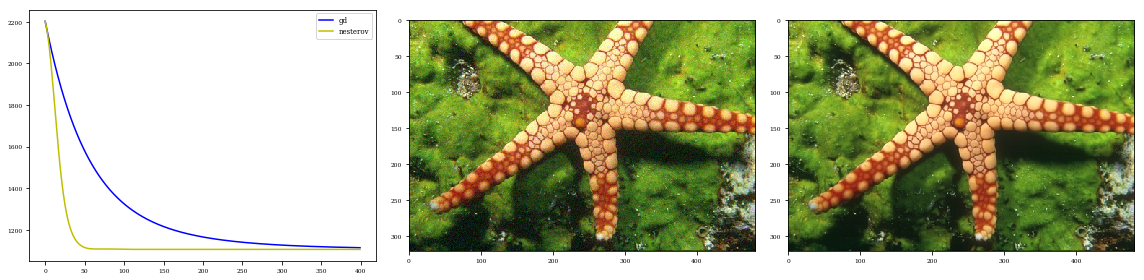

In [10]:
fig, axes = plt.subplots(ncols=3, figsize=(16,4)) 
plt.subplot(1,3,1)
plt.plot(e1,'b-',e2,'y-')
plt.legend(labels = ['gd', 'nesterov'], loc = 'upper right')
plt.subplot(1,3,2)
plt.imshow(y)
plt.subplot(1,3,3)
plt.imshow(x0)
fig.show()

### 12

In [11]:
print("For gradient descent, the energy after 50 iterations compared to the original energy", (e1[50]-e1[399])/(e1[0]-e1[399]))
print("For Nesterov acceleration, the energy after 50 iterations compared to the original energy", (e2[50]-e2[399])/(e2[0]-e2[399]))

For gradient descent, the energy after 50 iterations compared to the original energy 0.4276907676344612
For Nesterov acceleration, the energy after 50 iterations compared to the original energy 0.008277000210652558


m = 50 iterations is not enough for gradient descent, but is enough for Nesterov acceleration.

### 13

In [12]:
x0 = starfish
p = 0.4
sig = 2/255

R = im.RandomMasking(x0.shape, p)
y2 = R(x0)

x21, e21 = im.total_variation(y2, sig, H = None, m = 400, scheme = 'gd', rho=1, return_energy = True)
x22, e22 = im.total_variation(y2, sig, H = None, m = 400, scheme = 'nesterov', rho=1, return_energy = True)
print("For the random masking and gradient descent, the energy after 50 iterations compared to the original energy", (e21[50]-e21[399])/(e21[0]-e21[399]))
print("For the random masking and Nesterov acceleration, the energy after 50 iterations compared to the original energy", (e22[50]-e22[399])/(e22[0]-e22[399]))

nu = im.kernel('motion')
y3 = im.convolve(x0, nu, 'periodical')
x31, e31 = im.total_variation(y3, sig, H = None, m = 400, scheme = 'gd', rho=1, return_energy = True)
x32, e32 = im.total_variation(y3, sig, H = None, m = 400, scheme = 'nesterov', rho=1, return_energy = True)
print("For the motion blur and gradient descent, the energy after 50 iterations compared to the original energy", (e31[50]-e31[399])/(e31[0]-e31[399]))
print("For the motion blur and Nesterov acceleration, the energy after 50 iterations compared to the original energy", (e32[50]-e32[399])/(e32[0]-e32[399]))

For the random masking and gradient descent, the energy after 50 iterations compared to the original energy 0.6368973894459802
For the random masking and Nesterov acceleration, the energy after 50 iterations compared to the original energy 0.017836780698799917
For the motion blur and gradient descent, the energy after 50 iterations compared to the original energy 0.43749955197842727
For the motion blur and Nesterov acceleration, the energy after 50 iterations compared to the original energy 0.009392941860200807


The statement still holds: m = 50 iterations is not enough for gradient descent, but is enough for Nesterov acceleration.

## 3 Advanced solvers for Total-Variation

### 14

### 15

### 16

## 17

In [40]:
x0 = flowers
nu = im.kernel('motion')
y = im.convolve(x0, nu, 'periodical')
sig = 2/255
x1, e1 = im.total_variation(y, sig, H = None, m = 400, scheme = 'gd', rho=1, return_energy = True)
x2, e2 = im.total_variation(y, sig, H = None, m = 400, scheme = 'nesterov', rho=1, return_energy = True)
x3, e3 = im.total_variation(y, sig, H = None, m = 400, scheme = 'admm', rho=1, return_energy = True)
x4, e4 = im.total_variation(y, sig, H = None, m = 400, scheme = 'cp', rho=1, return_energy = True)

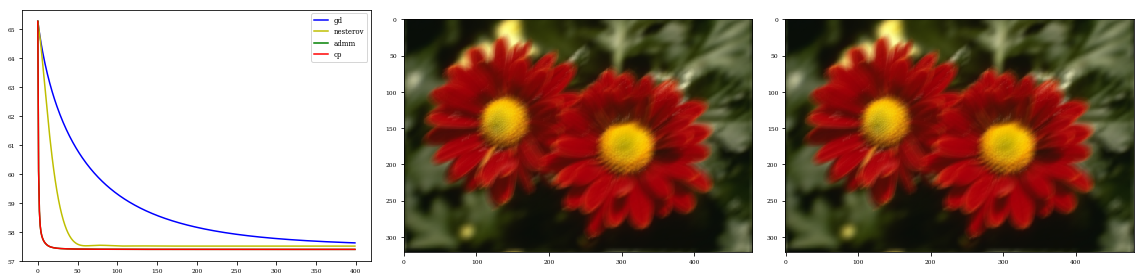

In [44]:
fig, axes = plt.subplots(ncols=3, figsize=(16,4)) 
plt.subplot(1,3,1)
plt.plot(e1,'b-',e2,'y-', e3, 'g-', e4, 'r-')
plt.legend(labels = ['gd', 'nesterov', 'admm', 'cp'], loc = 'upper right')
plt.subplot(1,3,2)
plt.imshow(y)
plt.subplot(1,3,3)
plt.imshow(x4)
fig.show()

### 18

Chambolle-Pock method is equivalent to ADMM if H = I. But in the general case, Chambolle-Pock is usually faster, since solving the subproblems of ADMM is harder.

## 4 Total Generalized Variation

### 19

When $\zeta =0$,
$$\\ E(x)=\frac { 1 }{ 2 } { ||y-Hx|| }_{ 2 }^{ 2 }+\tau \underset { z }{ min } ({ ||\triangledown x|| }_{ 1 }+{ ||divz|| }_{ 1 })$$
However, since the entire expression is inside a minimum with respect to z, the minimum z will be found that sets the ${ ||divz|| }_{ 1 }$ to be 0, which is just the 0 vector for z.
Therefore, TGV is equivalent to TV when $\zeta =0$.

## 20

To understand why TGV promotes piece-wise affine solutions, it is helpful to understand why TV does not promote affine solutions.
TV does not promote affine solutions since it is assuming that the gradient of x can only be taken in two directions (right and down, due to the definition of the grad kernel), this produces square artifacts in the TV reconstruction since by nature of the algorithm it is assuming that images consist of similar colorred square patches.
However, in TGV we discard this assumption with the addition of the z vector. The z vector now allows us to take the gradient in any direction, and, since it is minimized in the TGV expression, it chooses the direction z that minimizes the loss.
By doing this, we would assume that the resulting images will no longer have square artifacts in the result since the directions of TGV are not limited to the x,y axes.

### 21

This one is pretty simple, just take the given formula, substitute the matrices, and perform matrix multiplication to get the original TV formula. There is one step in the second term of the sum where we make use that ${ ||\cdot|| }_{ 1 }$ is a linear operator (since it is a sum) so we can separate out the $divz$. Otherwise, the $\underset{ z }{ min }$ from the original expression is lost, but that is acceptable since we are using a given z in the form of X = (x,z).

### 22

### 23

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


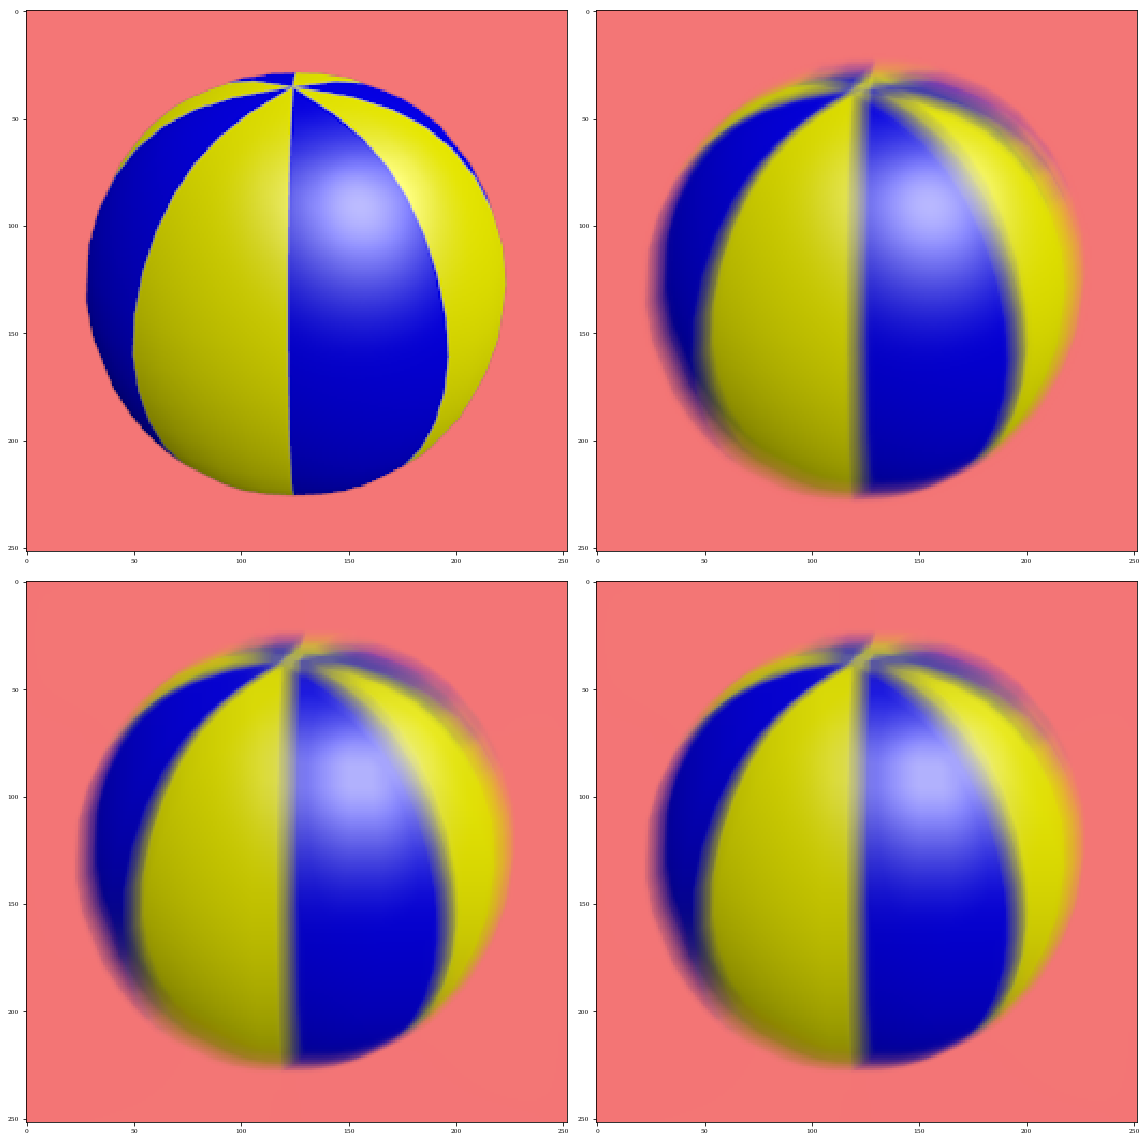

In [51]:
x0 = ball
nu = im.kernel('motion')
y = im.convolve(x0, nu, 'periodical')
sig = 10/255
x1, e1 = im.total_variation(y, sig, H = None, m = 400, scheme = 'admm', rho=1, return_energy = True)
x2, e2 = im.tgv(y, sig, H=None, zeta=.1, rho=1, m=400, return_energy = True)
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16)) 
plt.subplot(2,2,1)
plt.imshow(x0)
plt.subplot(2,2,2)
plt.imshow(y)
plt.subplot(2,2,3)
plt.imshow(x1)
plt.subplot(2,2,4)
plt.imshow(x2)
fig.show()

# Codes